In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from astropy.table import Table, join
from astropy import units as u
from edge_pydb import EdgeTable
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

## Plot CO observation parameters, a la Bolatto et al. (2017) Figure 4.  Note that the 'coobs' table is a simple CSV file, not ECSV.

In [2]:
coobs = EdgeTable('edge_coobs_de10.csv')

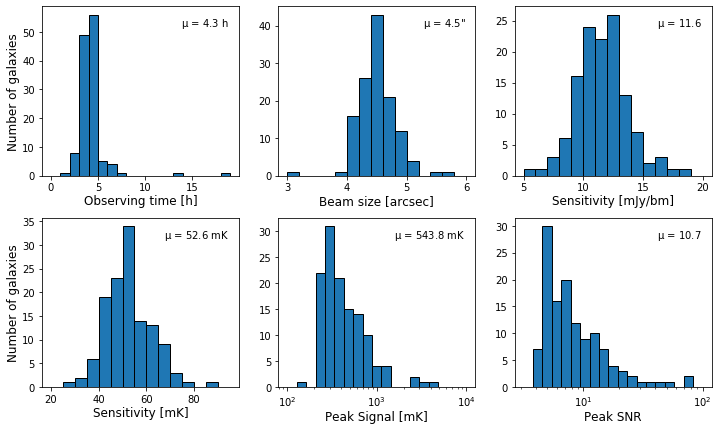

In [3]:
plt.figure(figsize=(12, 7))

ax1=plt.subplot(2,3,1)
plt.hist(coobs['coObstim'], bins=np.arange(0, 20, 1), ec='black')
plt.xlabel('Observing time [h]', labelpad=2, fontsize='large')
plt.ylabel('Number of galaxies', labelpad=2, fontsize='large')
ax1.text(0.95,0.88,'$\mu$ = %3.1f h' % np.mean(coobs['coObstim']),
    ha='right',transform=ax1.transAxes)

ax2=plt.subplot(2,3,2)
beam=np.sqrt(coobs['Bmaj']*coobs['Bmin'])
plt.hist(beam, bins=np.arange(3, 6.2, 0.2), ec='black')
plt.xlabel('Beam size [arcsec]', labelpad=2, fontsize='large')
tick_spacing = 1
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax2.text(0.95,0.88,'$\mu$ = %3.1f"' % np.mean(beam),
    ha='right', transform=ax2.transAxes)

ax3=plt.subplot(2,3,3)
plt.hist(coobs['coRMS_mJybm'], bins=np.arange(5,21,1), ec='black')
plt.xlabel('Sensitivity [mJy/bm]', labelpad=2, fontsize='large')
ax3.text(0.95,0.88,'$\mu$ = %4.1f' % np.mean(coobs['coRMS_mJybm']),
    ha='right', transform=ax3.transAxes)

ax4=plt.subplot(2,3,4)
plt.hist(coobs['coRMS_mK'], bins=np.arange(20,100,5), ec='black')
plt.xlabel('Sensitivity [mK]', labelpad=2, fontsize='large')
plt.ylabel('Number of galaxies', labelpad=2, fontsize='large')
ax4.text(0.95,0.88,'$\mu$ = %4.1f mK' % np.mean(coobs['coRMS_mK']),
    ha='right', transform=ax4.transAxes)

ax5=plt.subplot(2,3,5)
plt.hist(coobs['coTpk_mK'], bins=np.logspace(2,4,num=20), ec='black')
plt.xlabel('Peak Signal [mK]', labelpad=2, fontsize='large')
ax5.set_xscale("log")
ax5.text(0.95,0.88,'$\mu$ = %4.1f mK' % np.mean(coobs['coTpk_mK']),
    ha='right', transform=ax5.transAxes)

ax6=plt.subplot(2,3,6)
plt.hist(coobs['coSNRpeak'], bins=np.logspace(0.5,2,num=20), ec='black')
plt.xlabel('Peak SNR', labelpad=2, fontsize='large')
ax6.set_xscale("log")
ax6.text(0.95,0.88,'$\mu$ = %4.1f' % np.mean(coobs['coSNRpeak']),
    ha='right', transform=ax6.transAxes)

plt.subplots_adjust(hspace=0.25)
plt.show()

## Derive $S_{CO}$ to $M_{mol}$ conversion.

In [4]:
# Calculate molecular mass for 1 Jy km/s at 1 Mpc.
# These serve as fiducial distance and flux which we will scale later.
sco  = 1 * u.Jy * u.km / u.s
dmpc = (1 * u.Mpc).to(u.pc)
alphaco = 4.3 * u.solMass * u.s / (u.K * u.km * u.pc**2) # Bolatto+13
freq = 115.271204 * u.GHz
kperjy = (1*u.Jy/u.sr).to(u.K, equivalencies=u.brightness_temperature(freq))
molmass = alphaco * kperjy * (sco/u.Jy) * dmpc**2
print(molmass)

10533.072545614323 solMass


## Plot derived CO masses, a la Bolatto et al. (2017) Figure 5.  Need to merge in two additional tables.

In [5]:
# Measured CO fluxes
db = EdgeTable('edge_coflux_natv.csv')
# CALIFA params incl. distance
califa = EdgeTable('edge_califa.csv')
db.join(califa)
db.join(coobs)

# db1 = join(coflux, califa, keys='Name')
# db  = join(db1, coobs, keys='Name')

In [6]:
db

Name,coRactr_natv,coDectr_natv,coCtrint_natv,coDvhel,coBmaj_natv,coBmin_natv,coBpa_natv,coNomask_natv,coeNomask_natv,coNomaskDv_natv,coDilated_natv,coeDilated_natv,coSmooth_natv,coeSmooth_natv,coSmoothDv_natv,coMask2d_natv,coeMask2d_natv,coSNRmax_natv,coSNR4pix_natv,coSNR5pix_natv,cottBmaj_natv,cottBmin_natv,cottBpa_natv,cottNomask_natv,cotteNomask_natv,cottNomaskDv_natv,cottDilated_natv,cotteDilated_natv,cottSmooth_natv,cotteSmooth_natv,cottSmoothDv_natv,cottMask2d_natv,cotteMask2d_natv,cottSNRmax_natv,cottSNR4pix_natv,cottSNR5pix_natv,caMass,caeMass,caSFR,caeSFR,caOH,caeOH,caAvgas,caeAvgas,caAvstars,caeAvstars,Su,Sg,Sr,Si,caB,caV,caR,caRe,caeRe,caEllipticity,caPA,caR50,caeR50,caR90,caeR90,caOH_O3N2,caZgas,caZstars,caAge,caeAge,caFHa,caFHacorr,caLHacorr,caMstars,caDistMpc,caFlgWav5,caFlgReg5,caFlgImg5,caFlgWav12,caFlgReg12,caFlgImg12,coVsys,coObstim,coNpt,Bmaj,Bmin,coRMS_mJybm,coRMS_mK,coTpk_mK,coSNRpeak,co_mmom0_flux_Kkmsas^2,Last_updated
,deg,deg,K km / s,km / s,arcsec,arcsec,deg,Jy km / s,Jy km / s,km / s,Jy km / s,Jy km / s,Jy km / s,Jy km / s,km / s,Jy km / s,Jy km / s,,,,arcsec,arcsec,deg,Jy km / s,Jy km / s,km / s,Jy km / s,Jy km / s,Jy km / s,Jy km / s,km / s,Jy km / s,Jy km / s,,,,dex(solMass),dex(solMass),dex(solMass / yr),dex(solMass / yr),dex,dex,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,arcsec,arcsec,,deg,arcsec,arcsec,arcsec,arcsec,dex,,,dex(Gyr),dex(Gyr),dex(1e-16 erg / (cm2 s)),dex(1e-16 erg / (cm2 s)),dex(erg / s),dex(solMass),Mpc,,,,,,,,,,,,,,,,,
str13,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,str21
ARP220,233.7383,23.5037,789.489,-16.613,4.480,3.870,71.800,374.803,14.955,1600.000,466.559,3.359,455.962,5.146,900.000,457.043,10.338,104.751,254.000,157.000,4.580,3.920,82.000,-3.137,8.708,1600.000,19.458,1.006,22.128,1.894,780.000,15.432,4.193,6.298,43.000,8.000,10.9099,0.0872049,1.57499,0.180915,nan,nan,5.3402,0.700156,0.401422,1.76844,15.4727663,14.11019518,13.42762456,13.10010398,14.3881919,13.74703758,13.3581267,22.57252232,22.57252232,0.55050123,12.60185186,19.6445391,0.41902297,41.53416839,0.00725311,nan,0.01793838,0.01800146,8.95270263,0.40709788,3.09833195,4.88371559,42.67841756,11.1161373,77.97227561,0,0,0,0,0,0,5340.9,4.0,7,4.48,3.87,7.9,41.8,3472,83.03,46800.0,02/14/16 05:15:10 CST
IC0480,118.8467,26.7411,45.497,9.209,4.880,3.930,42.800,49.938,14.821,860.000,81.053,2.444,78.057,4.383,420.000,73.803,9.157,18.732,235.000,184.000,4.940,4.060,46.000,-3.923,7.306,860.000,3.845,0.537,4.489,1.001,220.000,5.376,2.438,5.470,48.000,3.000,10.2656,0.134175,0.113128,0.10015,8.48813,0.0458044,1.28283,0.0682296,0.401506,1.33692,16.11139949,15.0510197,14.47673959,14.17375345,15.26121259,14.76638769,14.41251353,20.20523629,20.20523629,0.98072158,-12.39856666,20.62375599,0.46026049,42.91970841,0.16740285,8.48941,0.01528139,0.01527649,8.75405618,0.40396314,3.11992931,3.26047552,40.94567316,10.39968968,66.2859101,1,0,0,0,1,0,4492.9,3.98,7,4.88,3.93,11.2,53.6,810,15.11,8870.0,02/15/16 16:09:31 CST
IC0540,142.5429,7.9028,39.810,9.316,6.220,3.630,31.000,-18.590,19.314,860.000,21.748,1.968,26.156,4.032,280.000,37.024,9.652,6.571,51.000,14.000,6.360,3.790,30.900,-3.064,8.322,860.000,nan,nan,nan,nan,nan,nan,nan,4.877,21.000,0.000,9.83805,0.121659,-1.08698,0.168827,nan,nan,1.6987,0.166415,0.41111,1.17407,15.81320321,14.48014295,13.80028433,13.43598517,14.77664606,14.11232722,13.71945744,14.59989845,

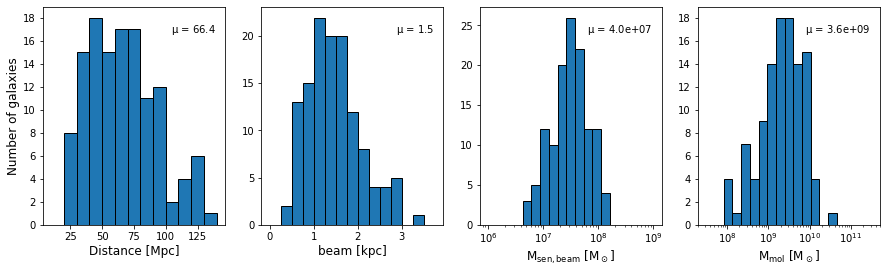

In [7]:
fig=plt.figure(figsize=(15, 4))

ax1=plt.subplot(1,4,1)
plt.hist(db['caDistMpc'],bins=np.arange(10, 150, 10), ec='black')
plt.xlabel('Distance [Mpc]', labelpad=3, fontsize='large')
plt.ylabel('Number of galaxies', labelpad=3, fontsize='large')
tick_spacing = 2
ax1.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.text(0.95,0.88,'$\mu$ = %3.1f' % np.mean(db['caDistMpc']),
    ha='right', transform=ax1.transAxes)

ax2=plt.subplot(1,4,2)
beam = (np.sqrt(db['coBmaj_natv']*db['coBmin_natv'])).to(u.rad)
bmkpc = beam.value*db['caDistMpc']*1000.
plt.hist(bmkpc,bins=np.arange(0, 4, 0.25), ec='black')
plt.xlabel('beam [kpc]', labelpad=3, fontsize='large')
ax2.text(0.95,0.88,'$\mu$ = %3.1f' % np.mean(bmkpc),
    ha='right', transform=ax2.transAxes)

ax3=plt.subplot(1,4,3)
# Multiply 10 km/s noise by sqrt(3) to get sensitivity to a 30 km/s line
# Multiply by 4 to get 4-sigma sensitivity
msens = 4*molmass*(db['caDistMpc']**2)*db['coRMS_mJybm']*10.*np.sqrt(3)/1000.
plt.hist(msens.value,bins=np.logspace(6, 9, num=20), ec='black')
plt.xlabel('$M_{sen,beam}$ [$M_\odot$]', labelpad=3, fontsize='large')
ax3.set_xscale("log")
ax3.text(0.95,0.88,'$\mu$ = %4.1e' % np.mean(msens.value),
    ha='right', transform=ax3.transAxes)

ax4=plt.subplot(1,4,4)
mgas = molmass*db['caDistMpc']**2*db['coSmooth_natv']
mgas = mgas[~np.isnan(mgas)]
plt.hist(mgas.value,bins=np.logspace(7.5, 11.5, num=20), ec='black')
plt.xlabel('$M_{mol}$ [$M_\odot$]', labelpad=3, fontsize='large')
ax4.set_xscale("log")
ax4.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax4.text(0.95,0.88,'$\mu$ = %4.1e' % np.mean(mgas.value),
    ha='right', transform=ax4.transAxes)

plt.show()

## Make scatterplots related to star-forming main sequence

In [8]:
print(califa.colnames)

['Name', 'caMass', 'caeMass', 'caSFR', 'caeSFR', 'caOH', 'caeOH', 'caAvgas', 'caeAvgas', 'caAvstars', 'caeAvstars', 'Su', 'Sg', 'Sr', 'Si', 'caB', 'caV', 'caR', 'caRe', 'caeRe', 'caEllipticity', 'caPA', 'caR50', 'caeR50', 'caR90', 'caeR90', 'caOH_O3N2', 'caZgas', 'caZstars', 'caAge', 'caeAge', 'caFHa', 'caFHacorr', 'caLHacorr', 'caMstars', 'caDistMpc', 'caFlgWav5', 'caFlgReg5', 'caFlgImg5', 'caFlgWav12', 'caFlgReg12', 'caFlgImg12']


dex(solMass) dex(solMass / yr)


Text(0, 0.5, 'log(SFR [$M_\\odot$ yr$^{-1}$])')

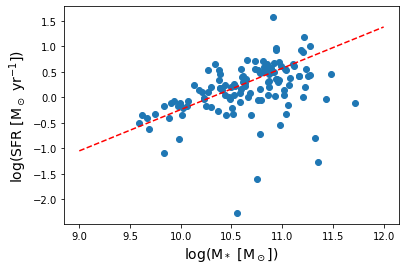

In [9]:
print(db['caMass'].unit,db['caSFR'].unit)
valid_ssfr = (~np.isnan(db['caMass'])) & (~np.isnan(db['caSFR']))
plt.scatter(db['caMass'][valid_ssfr],db['caSFR'][valid_ssfr])
x_ms = np.linspace(9,12,num=50)
y_ms = 0.81*x_ms-8.34
plt.plot(x_ms,y_ms,'r--')
plt.xlabel('log($M_*$ [$M_\odot$])', fontsize=14)
plt.ylabel('log(SFR [$M_\odot$ yr$^{-1}$])', fontsize=14)

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater_equal
  return getattr(self.data, op)(other)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


Text(0, 0.5, 'log($t_{dep}$ [yr])')

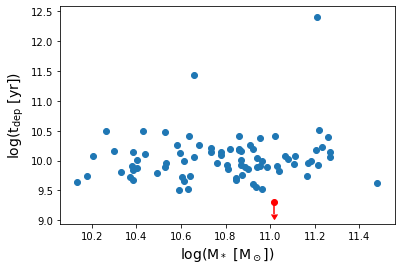

In [10]:
gasmass = molmass*db['coSmooth_natv']*db['caDistMpc']**2
det  = np.where(db['coSmooth_natv']/db['coeSmooth_natv']>=4)[0]
ndet = np.where(db['coSmooth_natv']/db['coeSmooth_natv']<4)[0]
tgaslg = np.log10(gasmass.value/db['caSFR'])
plt.scatter(db['caMass'][det],tgaslg[det])
plt.scatter(db['caMass'][ndet],tgaslg[ndet],color='red')
uplims = np.zeros(db['caMass'][ndet].shape)
uplims[:] = True
plt.errorbar(db['caMass'][ndet],tgaslg[ndet], uplims=uplims, 
             yerr=0.2, ls='none', color='red')
plt.xlabel('log($M_*$ [$M_\odot$])', fontsize=14)
plt.ylabel('log($t_{dep}$ [yr])', fontsize=14)

Text(0.5, 0, 'log($M(H_2)$ [$M_\\odot$])')

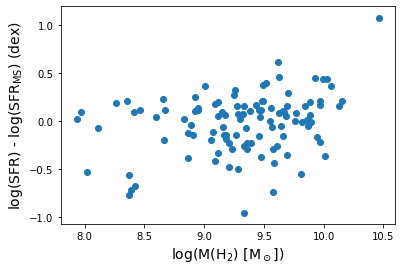

In [11]:
delsfr = db['caSFR'] - (0.81*db['caMass']-8.34)
valid_mgas = (~np.isnan(db['caMass'])) & (~np.isnan(db['caSFR'])) & (~np.isnan(db['coSmooth_natv']))
mgas = np.log10(1.05e4*db['caDistMpc']**2*db['coSmooth_natv'])
plt.scatter(mgas[valid_mgas], delsfr[valid_mgas])
plt.ylabel(r'log(SFR) - log(SFR$_{\rm MS}$) (dex)', fontsize=14)
plt.xlabel('log($M(H_2)$ [$M_\odot$])', fontsize=14)

Text(0.5, 0, 'log($M(H_2)/M_*$)')

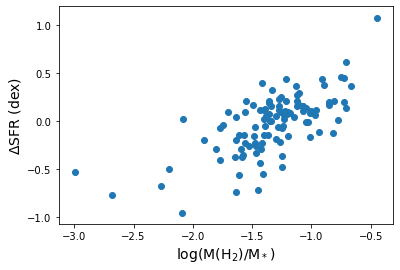

In [12]:
fgas = mgas - db['caMass']
plt.scatter(fgas[valid_mgas], delsfr[valid_mgas])
plt.ylabel('$\Delta$SFR (dex)', fontsize=14)
plt.xlabel('log($M(H_2)/M_*$)', fontsize=14)